# Классы: продолжение
## Представление функции с параметрами в виде класса
Пример с вертикальным движением тела в поле силы тяжести: $y(t) = v_0 t - \frac{g t^2}{2}$. В качестве параметров возьмем $v_0$ и $g$. Каким образом лучше реализовать данные функции? 

__Очевидное решение__: функция нескольких аргументов.

In [1]:
def VerticalCoordinate(time, initialSpeed, gravityAcceleration):
    return initialSpeed*time - 0.5*gravityAcceleration*time**2

Однако, при проведении численного дифференцирования данной функции возникнет проблема, так как функции взятия производной в качестве аргумента требуется функция 1-й переменной:

In [2]:
def TakeDerivative(function, x, step=1e-5):
    return (function(x + step) - function(step))/float(step)

# тестирование на паре функций
import math as m
listOfPoints = [0.1, (m.pi)**2]
listOfFunctions = [lambda t: t**3 + 3*t**2 - 65*t, m.sin]

i = 0
for function, point in zip(listOfFunctions, listOfPoints):
    i += 1
    print 'Derivative #%d = %.2f\n' % (i, TakeDerivative(function, point))

Derivative #1 = -646899.37

Derivative #2 = -43032.02



К сожалению, функция TakeDerivative() не сможет работать с нашей VerticalCoordinate.
__Неудачное решение__: использование глобальных переменных.

In [3]:
# .... (тут объявление этих переменных)

def VerticalCoordinate(time):
    gravityAccelertion = 9.81
    return initialSpeed*time - 0.5*gravityAcceleration*time**2

Как известно, использование глобальных переменных требуется сводить к минимуму с целью избегания ошибок из-за путанницы в именах в различных областях видимости.

__Еще способ__: Для каждого значения initialSpeed можно написать отдельную функцию (еще неудачней). Написание же n-го количества версий первой для функций с количеством аргументов от 1 до n  представляется не очень оптимальным решением данной задачи. Мы же стремимся к написанию ПО, работающему в самых общих случаях.

Как решить проблему? Использовать __классы__. Переменные класса видны всем его методам, поэтому в контексте класса их можно рассматривать в качестве "глобальных":

In [4]:
class VerticalCoordinate:
    def __init__(self, initialSpeed):
        self._initialSpeed = initialSpeed
        self._gravityAcceleration = 9.81
        
    def CalculateValue(self, time):
        return self._initialSpeed*time - 0.5*self._gravityAcceleration*time**2
    


# версия с отсутствием инициализации переменной g;
class VerticalCoordinate2:
    '''
    При отсутствии опеределения конструктора 
    интерпретатор автоматически создает пустой
    '''
    def CalculateValue(self, time, initialSpeed):
        return initialSpeed*time - 0.5*self._gravityAcceleration*time**2

# использование
ball = VerticalCoordinate(0.5)
print ball.CalculateValue(5)

-120.125


Для большего удобства вместо конструкции __object.CalculateValue(x)__ хочется использовать более привычную операцию вызова функции __object(x)__. В языке С++ для этого существует __перегрузка операторов__, позволяющая переопределять многие стандартные операторы "()", "+", "-", " * ", "/" и.т.д. В языке Python эту роль на себя берут т.н. __магические методы__.
Используем один из них в классе для функции:

In [5]:
# нерабочий код для функции с n-параметрами
class MyFunction:
    def __init__(self, p0, p1, p2, ..., pn):
        self._p0 = p0
        self._p1 = p1
        ...
        self._pn = pn

    def __call__(self, x): # заменяет функцию CalculateValue(x) 
                           # object.__self(x)__ --- object(x)
        return ...

SyntaxError: invalid syntax (<ipython-input-5-a6eaff45b214>, line 3)

Объекты, в которых методом __--call--__(x) перегружена операция "()"  называются __функциональными объектами__ или сокращенно __фукторами__.

## Магические методы
Их имеется довольно большое количество:

* __--init--__(self)
Конструктор

* __--del--__(self) 
Деструктор

* __--pos--__(self)
Определяет поведение для унарного плюса (+some_object)


* __--neg--__(self)
Определяет поведение для отрицания (-some_object)


* __--abs--__(self)
Определяет поведение для встроенной функции abs().


* __--invert--__(self)
Определяет поведение для инвертирования оператором ~.


* __--round--__(self, n)
Определяет поведение для встроенной функции round(). n это число знаков после запятой, до которого округлить.


* __--floor--__(self)
Определяет поведение для math.floor(), то есть, округления до ближайшего меньшего целого.


* __--ceil--__(self)
Определяет поведение для math.ceil(), то есть, округления до ближайшего большего целого.

.........................

## Автоматическое дифференцирование функций.
Рассмотрим различные способы реализации операции дифференцирования. __1-й__:

In [6]:
import math as m
def Differentiate(function, x, step=1e-5):
    return (function(x + step) - function(x - step))/ (2.*float(step))
 
def TestFunction(x):
    return x**3 * m.sin(x)

print Differentiate(TestFunction, 0.4)

0.245868708064


__Способ №2__: функция, возвращающая функцию (т.н. __замыкание__). __Замыкание__ (англ. closure) — функция, в теле которой присутствуют ссылки на переменные, объявленные вне тела этой функции в окружающем коде и не являющиеся её параметрами.

In [7]:
def Derivative(function, step=1e-5):
    def DfDx(x):
        #print x
        return (function(x + step) - function(x - step))/(2.*float(step))
        
    return DfDx # это замыкание помнит значение внешней переменной step и function
    
derivative1 = Derivative(TestFunction) # теперь derivative1 ведет себя как обыкновенная функция
print derivative1(1.5)

6.97182921503


__Способ №3__: написание отдельного класса, способного вызывать функцию и хранить её состояние в полях.

In [8]:
# класс, реализующий формулу численного дифференцирования
class SimpleDerivative:
    def __init__(self, function, step):
        self._function = function
        self._step = float(step)

    def __call__(self, x):
        return (self._function(x + self._step) - self._function(x - self._step))/(2*self._step)
    
# тестирование
derivative1 = SimpleDerivative(m.cos, 1e-5)
print derivative1(9.76) # теперь derivative1 ведет себя как обыкновенная функция

0.328978857889


Остановимся на последнем способе. Перейдем к использованию класса: протестируем его на различных функциях.

Возвращаясь к обычным функциям: напоминаю, что всё в Python является объектом, в том числе и функция. Т.е. ее тоже можно рассматривать как функциональный объект, что позволяет взаимодействовать с ней как с обыкновенной переменной (помещать в списки, к примеру). В языке С для реализации массива из функций пришлось бы использовать указатели на функции, что порождает множество сложностей, если эти функции имеют различное число аргументов и различные возвращаемые значения [ пример объявления указателя: __int (*ptrToFunction)(float, char, char);__ ].

Для оценки погрешности численного дифференцирования потребуются аналитические значения производных, которые получим с помощью библиотеки SymPy:

In [9]:
import math as m
import numpy as np

import sympy as smp
xSym = smp.Symbol('x') # импортируем символ переменной для использования символьными функциями


# символьные функции требуют явного указания аргумента (в отличие от "численных" из библиотеки math)
listOfSymbolicFunctions = [smp.sin(xSym), smp.cos(xSym), smp.exp(xSym), smp.tan(xSym)] 
#listOfFunctions = [m.sin, m.cos, m.exp, m.tan]

# генерируем "численные" функции из символьных: этим занимается функция lambdify
listOfFunctions = [smp.lambdify(xSym, f) for f in listOfSymbolicFunctions]
# используем написанный класс
h0 = 1e-5
listOfNumericalDerivatives = [SimpleDerivative(f, h0) for f in listOfFunctions]


print listOfSymbolicFunctions, '\n\n', listOfFunctions # смотрим, что за объекты

[sin(x), cos(x), exp(x), tan(x)] 

[<function <lambda> at 0x7f33d805f578>, <function <lambda> at 0x7f33c7398b90>, <function <lambda> at 0x7f33c739c230>, <function <lambda> at 0x7f33c739c398>]


Построение графиков производных

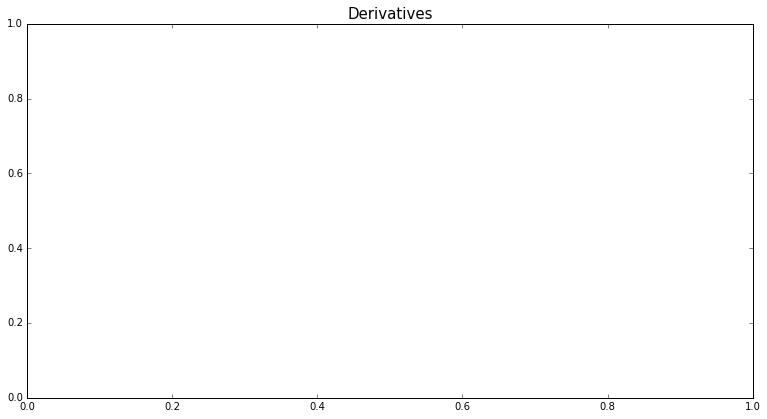

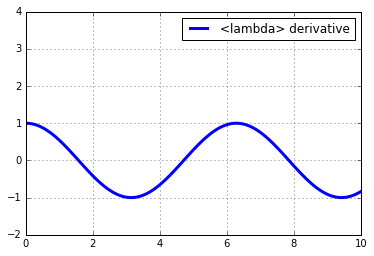

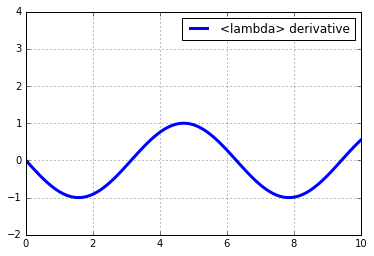

TypeError: 'list' object is not callable

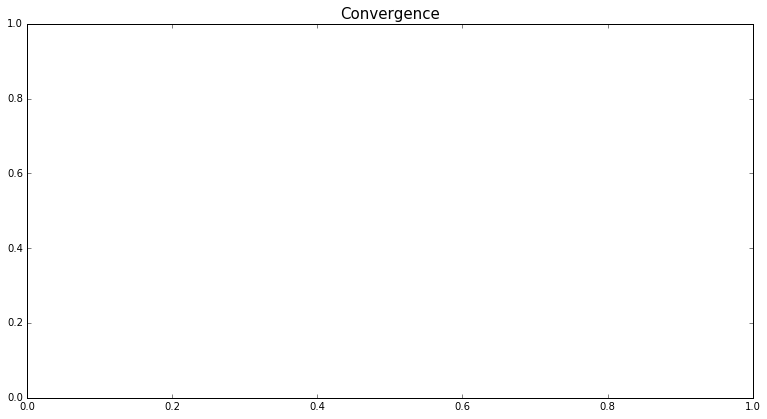

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
xLeft, xRight = 0., 10.
numPoints = 100
xData = np.linspace(xLeft, xRight, numPoints)
yDataList = []


figureSizeConst = (13, 6.7) # в дюймах
plt.figure(figsize=figureSizeConst) # строим графики производных в общем окне
plt.title('Derivatives', fontsize=15)

for function, derivative in zip(listOfFunctions, listOfNumericalDerivatives):   
    yData = []
    for x in list(xData):
        yData.append(derivative(x))
        
    yDataList.append(np.array(yData)) # приводим список yData к типу массива NumPy
    
    plt.figure() # если хотим видеть каждый график в отдельном окне
    
    #labell = function.__name__ + ' derivative'
    plt.plot(xData, yData, '-o', linewidth = 3, markersize = 0., label = labell)
    plt.grid('on')
    plt.ylim([-2., 4.])
    plt.legend(loc = 'best')

plt.show()


# символьное дифференцирование; используем генераторы списков
listOfSymbolicDerivatives = [smp.diff(f, xSym) for f in listOfSymbolicFunctions]
listOfAnaliticalDerivatives = [smp.lambdify(xSym, f) for f in listOfSymbolicDerivatives]

# построение зависимости погрешностей формул численного дифференцирования от величины шага 
x0 = 5.
listOfSteps = [2**(-n) for n in range(2, 15)]


plt.figure(figsize=figureSizeConst)
plt.title('Convergence', fontsize=15)
for function, analiticalDerivative in zip(listOfFunctions,\
                                          listOfAnaliticalDerivatives):
    
    listOfErrors = []
    
    for h in listOfSteps:
        numericalDerivative = SimpleDerivative(function, h) # функтор - пользуемся как функцией
        error = m.fabs(numericalDerivative(x0) - analiticalDerivative(x0))
        listOfErrors.append(error)
    
    
    plt.loglog(np.array(listOfSteps), np.array(listOfErrors), 'v-', markersize=15, linewidth = 4)
    plt.legend()
    plt.grid('on')
    plt.xlabel('h')
    plt.ylabel('Global error')
    
plt.show()

## Более полный класс для представления функций
Расширим класс Function() добавлением в него методов вычисления производных произвольного порядка. Т.к. численное дифференцирование не зависит от конкретного вида функции, то эти методы можно реализовать, а метод вычисления значения сделать чисто виртуальным, затем переопределив его в классах-наследниках (уже конкретных функциях). При создании объекта абстрактного класса его функции будут заниматься дифференцированием непонятно чего, корректно работать же будут работать только в классах наследниках, где функция __--call--(x)__ реализована.

In [11]:
class AbstractFunctionWithDerivatives:
    
    def __init__(self, step=1e-5):
        self._step = float(step) # больше ничего не требуется
        
    def __call__(self, x):
        raise NotImplementedError # вычисление значения пока неизвестной функции (чистая виртуальная)
    
    # self --- ссылка на сам создаваемый объект. self(x) --- self.__call__(x).
    def Calculate1stDerivative(self, x):
        return (self(x + self._step) - self(x - self._step))/float(2*self._step) 
    
    def Calculate2ndDerivative(self, x):
        return (self(x + self._step) - 2*self(x) + self(x - self._step)) / (self._step)**2
    
    
    
class Parabola(AbstractFunctionWithDerivatives):
    def __init__(self, a, b, c, d, step=1e-5):
        AbstractFunctionWithDerivatives.__init__(self, step)
        self._a = a
        self._b = b
        self._c = c
        self._d = d
    
    def __call__(self, x): # переопределяем
        return self._a*x**3 + self._b*x**2 + self._c*x + self._d
    
    
class SpecialFunction(AbstractFunctionWithDerivatives):
    def __init__(self, a, b, step=1e-5):
        AbstractFunctionWithDerivatives.__init__(self, step)
        self._a = a
        self._b = b
        
    def __call__(self, x):
        return m.cos(self._a + self._b*m.exp(x**2))

Тестируем:

In [12]:
listOfFunctions = [ [Parabola(i, 2*i, -3*i**2, 10*i), SpecialFunction(2*i, 5*i)]\
                   for i in range(2, 6)] # список из списков

listOfFunctions = map(list, zip(*listOfFunctions)) # транспонируем чтобы можно было пройтись в цикле

for function1, function2 in zip(listOfFunctions[0], listOfFunctions[1]):
    print '1st derivative = %.1f' % function1.Calculate1stDerivative(0.4)
    print '2nd derivative = %.2f' % function2.Calculate2ndDerivative(0.4)

1st derivative = -7.8
2nd derivative = 88.94
1st derivative = -20.8
2nd derivative = 38.36
1st derivative = -39.7
2nd derivative = -355.39
1st derivative = -64.6
2nd derivative = -39.92
